In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [25]:
data=pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
data.shape

(150, 6)

<Axes: xlabel='PetalWidthCm'>

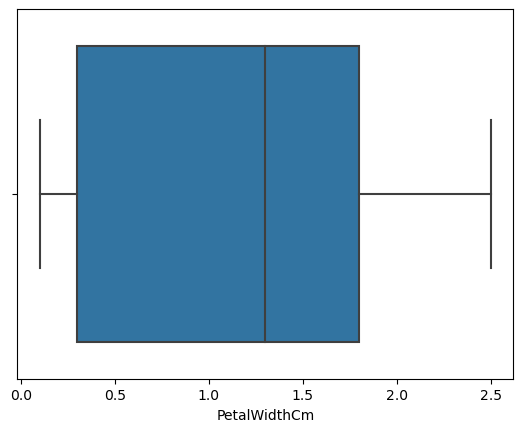

In [28]:
sns.boxplot(data=data,x=data['PetalWidthCm'])

<Axes: xlabel='PetalLengthCm'>

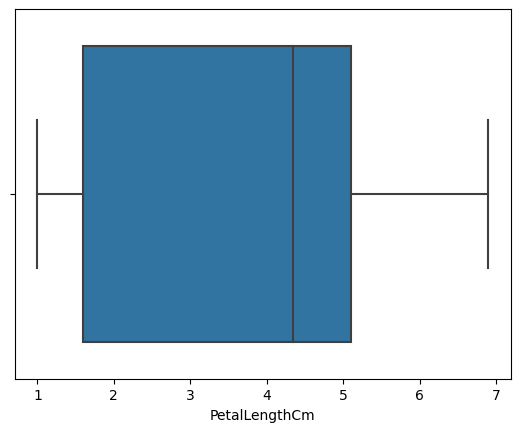

In [29]:
sns.boxplot(data=data,x=data['PetalLengthCm'])

<Axes: xlabel='SepalLengthCm'>

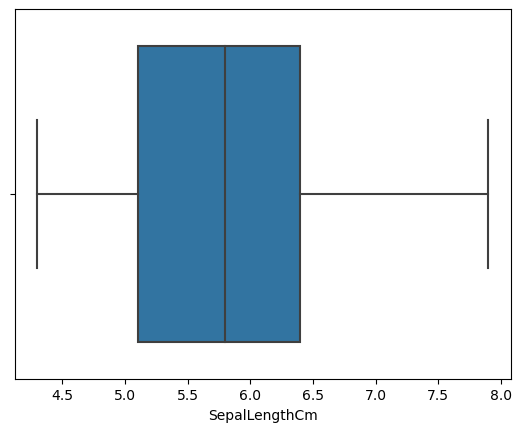

In [30]:
sns.boxplot(data=data,x=data['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm'>

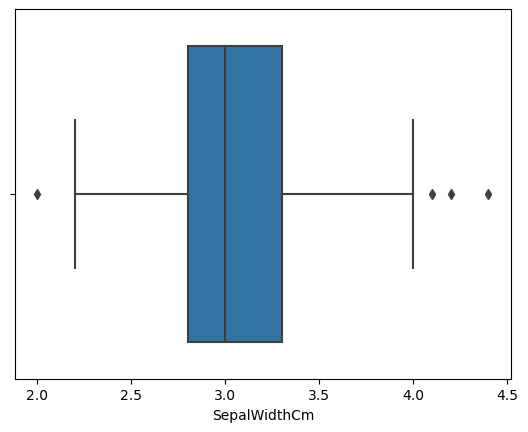

In [31]:
sns.boxplot(data=data,x=data['SepalWidthCm'])

In [32]:
features = data.drop('Species', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(features_scaled)



C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
hc_result = linkage(features_scaled, method='ward')
data['Cluster_Hierarchical'] = fcluster(hc_result, 3, criterion='maxclust')



In [37]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)


Text(0.5, 1.0, 'K-Means Clustering')

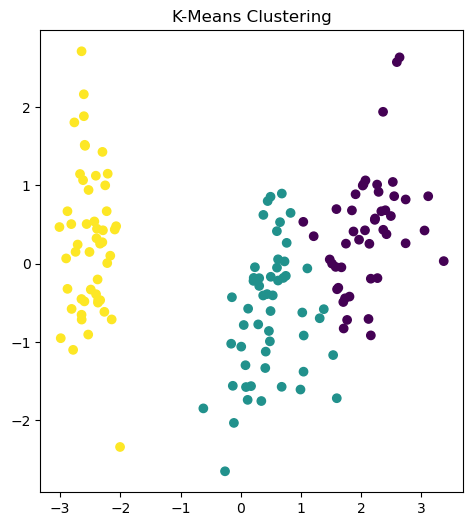

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=data['Cluster_KMeans'], cmap='viridis')
plt.title('K-Means Clustering')

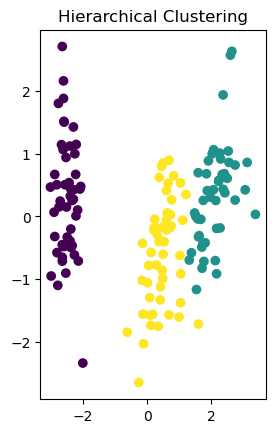

In [36]:
plt.subplot(1, 2, 2)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=data['Cluster_Hierarchical'], cmap='viridis')
plt.title('Hierarchical Clustering')

plt.show()